## 欠損値の処理

In [1]:
from modules.constants import local_paths
from modules import predict
import os
import numpy as np
import pandas as pd
import pickle

%load_ext autoreload 

In [65]:
%autoreload

In [66]:
df = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_20_to_21.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str, 'owner_id': str})

In [67]:
df.drop(columns=['owner_id'], inplace=True, errors='ignore')

In [68]:
pd.options.display.max_columns = 300

In [69]:
df

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,weather,ground_state,race_class,place,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,weather_mode,weather_mode_past_5,race_type_mode,race_type_mode_past_5,ground_state_mode,ground_state_mode_past_5,race_class_mode,race_class_mode_past_5,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,jockey_n_top_3_mean,jockey_n_top_3_sum,jockey_n_4th_or_below_mean,jockey_n_4th_or_below_sum,jockey_stakes_participation_mean,jockey_stakes_participation_sum,jockey_stakes_win_mean,jockey_stakes_win_sum,jockey_special_participation_mean,jockey_special_participation_sum,jockey_special_win_mean,jockey_special_win_sum,jockey_flat_participation_mean,jockey_flat_participation_sum,jockey_lawn_participation_mean,jockey_lawn_participation_sum,jockey_lawn_win_mean,jockey_lawn_win_sum,jockey_dirt_participation_mean,jockey_dirt_participation_sum,jockey_dirt_win_mean,jockey_dirt_win_sum,jockey_win_proba_mean,jockey_win_proba_max,jockey_top_2_proba_mean,jockey_top_2_proba_max,jockey_top_3_proba_mean,jockey_top_3_proba_max,jockey_earned_prize_mean,jockey_earned_prize_max,jockey_earned_prize_sum,jockey_rank_last_year,jockey_n_top_1_last_year,jockey_n_top_2_last_year,jockey_n_top_3_last_year,jockey_n_4th_or_below_last_year,jockey_stakes_participation_last_year,jockey_stakes_win_last_year,jockey_special_participation_last_year,jockey_special_win_last_year,jockey_flat_participation_last_year,jockey_lawn_participation_last_year,jockey_lawn_win_last_year,jockey_dirt_participation_last_year,jockey_dirt_win_last_year,jockey_win_proba_last_year,jockey_top_2_proba_last_year,jockey_top_3_proba_last_year,jockey_earned_prize_last_year,reference_year_last_year,reference_year_last_two_years,jockey_rank_mean_last_two_years,jockey_rank_min_last_two_years,jockey_rank_max_last_two_years,jockey_n_top_1_mean_last_two_years,jockey_n_top_1_sum_last_two_years,jockey_n_top_2_mean_last_two_years,jockey_n_top_2_sum_last_two_years,jockey_n_top_3_mean_last_two_years,jockey_n_top_3_sum_last_two_years,jockey_n_4th_or_below_mean_last_two_years,jockey_n_4th_or_below_sum_last_two_years,jockey_stakes_participation_mean_last_two_years,jockey_stakes_participation_sum_last_two_years,jockey_stakes_win_mean_last_two_years,jockey_stakes_win_sum_last_two_years,jockey_special_participation_mean_last_two_years,jockey_special_participation_sum_last_two_years,jockey_special_win_mean_last_two_years,jockey_special_win_sum_last_two_years,jockey_flat_participation_mean_last_two_years,jockey_flat

In [70]:
df.dropna()

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,weather,ground_state,race_class,place,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,weather_mode,weather_mode_past_5,race_type_mode,race_type_mode_past_5,ground_state_mode,ground_state_mode_past_5,race_class_mode,race_class_mode_past_5,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,jockey_n_top_3_mean,jockey_n_top_3_sum,jockey_n_4th_or_below_mean,jockey_n_4th_or_below_sum,jockey_stakes_participation_mean,jockey_stakes_participation_sum,jockey_stakes_win_mean,jockey_stakes_win_sum,jockey_special_participation_mean,jockey_special_participation_sum,jockey_special_win_mean,jockey_special_win_sum,jockey_flat_participation_mean,jockey_flat_participation_sum,jockey_lawn_participation_mean,jockey_lawn_participation_sum,jockey_lawn_win_mean,jockey_lawn_win_sum,jockey_dirt_participation_mean,jockey_dirt_participation_sum,jockey_dirt_win_mean,jockey_dirt_win_sum,jockey_win_proba_mean,jockey_win_proba_max,jockey_top_2_proba_mean,jockey_top_2_proba_max,jockey_top_3_proba_mean,jockey_top_3_proba_max,jockey_earned_prize_mean,jockey_earned_prize_max,jockey_earned_prize_sum,jockey_rank_last_year,jockey_n_top_1_last_year,jockey_n_top_2_last_year,jockey_n_top_3_last_year,jockey_n_4th_or_below_last_year,jockey_stakes_participation_last_year,jockey_stakes_win_last_year,jockey_special_participation_last_year,jockey_special_win_last_year,jockey_flat_participation_last_year,jockey_lawn_participation_last_year,jockey_lawn_win_last_year,jockey_dirt_participation_last_year,jockey_dirt_win_last_year,jockey_win_proba_last_year,jockey_top_2_proba_last_year,jockey_top_3_proba_last_year,jockey_earned_prize_last_year,reference_year_last_year,reference_year_last_two_years,jockey_rank_mean_last_two_years,jockey_rank_min_last_two_years,jockey_rank_max_last_two_years,jockey_n_top_1_mean_last_two_years,jockey_n_top_1_sum_last_two_years,jockey_n_top_2_mean_last_two_years,jockey_n_top_2_sum_last_two_years,jockey_n_top_3_mean_last_two_years,jockey_n_top_3_sum_last_two_years,jockey_n_4th_or_below_mean_last_two_years,jockey_n_4th_or_below_sum_last_two_years,jockey_stakes_participation_mean_last_two_years,jockey_stakes_participation_sum_last_two_years,jockey_stakes_win_mean_last_two_years,jockey_stakes_win_sum_last_two_years,jockey_special_participation_mean_last_two_years,jockey_special_participation_sum_last_two_years,jockey_special_win_mean_last_two_years,jockey_special_win_sum_last_two_years,jockey_flat_participation_mean_last_two_years,jockey_flat

In [71]:
returns = pd.read_csv(os.path.join(local_paths.COMPLETED_DIR, 'returns_22_to_23.csv'), index_col=0 ,sep="\t")
returns

,race_id,単勝_rank,単勝_returns,複勝_rank,複勝_returns,枠連_rank,枠連_returns,馬連_rank,馬連_returns,ワイド_rank,ワイド_returns,馬単_rank,馬単_returns,三連複_rank,三連複_returns,三連単_rank,三連単_returns
0,202206010101,[15],[680],"[15, 10, 4]","[210, 1600, 170]","[5, 8]",[2680],"[10, 15]",[31040],"[10, 15, 4, 15, 4, 10]","[6890, 660, 5640]","[15, 10]",[46070],"[4, 10, 15]",[46240],"[15, 10, 4]",[338400]
1,202206010102,[1],[1510],"[1, 8, 10]","[280, 110, 220]","[1, 4]",[860],"[1, 8]",[1060],"[1, 8, 1, 10, 8, 10]","[520, 1710, 350]","[1, 8]",[3510],"[1, 8, 10]",[2650],"[1, 8, 10]",[21660]
2,202206010103,[5],[430],"[5, 7, 11]","[130, 2620, 110]","[3, 4]",[2750],"[5, 7]",[63780],"[5, 7, 5, 11, 7, 11]","[11540, 180, 8280]","[5, 7]",[82850],"[5, 7, 11]",[24950],"[5, 7, 11]",[224010]
3,202206010104,[5],[630],"[5, 6, 10]","[190, 120, 450]","[5, 6]",[520],"[5, 6]",[580],"[5, 6, 5, 10, 6, 10]","[320, 2520, 1010]","[5, 6]",[1570],"[5, 6, 10]",[5090],"[5, 6, 10]",[24170]
4,202206010105,[8],[190],"[8, 6, 9]","[110, 110, 140]","[6, 8]",[190],"[6, 8]",[240],"[6, 8, 8, 9, 6, 9]","[140, 210, 260]","[8, 6]",[440],"[6, 8, 9]",[320],"[8, 6, 9]",[1210]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,202309050908,[8],[270],"[8, 14, 3]","[160, 170, 650]","[5, 8]",[520],"[8, 14]",[840],"[8, 14, 3, 8, 3, 14]","[440, 1960, 3500]","[8, 14]",[1490],"[3, 8, 14]",[12740],"[8, 14, 3]",[35560]
3452,202309050909,[16],[350],"[16, 9, 14]","[200, 1410, 460]","[5, 8]",[1970],"[9, 16]",[12570],"[9, 16, 14, 16, 9, 14]","[3580, 1190, 6950]","[16, 9]",[15500],"[9, 14, 16]",[46670],"[16, 9, 14]",[144610]
3453,202309050910,[11],[1710],"[11, 6, 9]","[390, 200, 190]","[6, 8]",[630],"[6, 11]",[3770],"[6, 11, 9, 11, 6, 9]","[1160, 1600, 630]","[11, 6]",[8960],"[6, 9, 11]",[7020],"[11, 6, 9]",[68800]
3454,202309050911,[15],[610],"[15, 10, 5]","[170, 110, 170]","[6, 8]",[430],"[10, 15]",[500],"[10, 15, 5, 15, 5, 10]","[290, 720, 280]","[15, 10]",[1410],"[5, 10, 15]",[1420],"[15, 10, 5]",[8900]


In [72]:
df_22_23 = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_22_to_23.csv'), 
                    index_col=0,  sep="\t", dtype={'jockey_id': str, 'trainer_id': str, 'owner_id': str})
df_22_23.drop(columns=['owner_id'], inplace=True, errors='ignore')
df_22_23.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'rank', 'frame',
       'number', 'sex', 'age', 'impost',
       ...
       'jockey_dirt_win_sum_last_two_years',
       'jockey_win_proba_mean_last_two_years',
       'jockey_win_proba_max_last_two_years',
       'jockey_top_2_proba_mean_last_two_years',
       'jockey_top_2_proba_max_last_two_years',
       'jockey_top_3_proba_mean_last_two_years',
       'jockey_top_3_proba_max_last_two_years',
       'jockey_earned_prize_mean_last_two_years',
       'jockey_earned_prize_max_last_two_years',
       'jockey_earned_prize_sum_last_two_years'],
      dtype='object', length=191)

## RFmodel

In [13]:
%autoreload

In [43]:
rf = predict.RFModel(
  train_df=df, returns_df=returns, bet_type='sanrentan', threshold=0.6, max_bet=1000, pivot_horse=True, stochastic_variation=False)
pred_df = rf.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[7926 1964]
 [1351 1518]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83      9890
           1       0.44      0.53      0.48      2869

    accuracy                           0.74     12759
   macro avg       0.65      0.67      0.65     12759
weighted avg       0.76      0.74      0.75     12759

Accuracy: 0.7401833999529743
Selected Feature Importance:
                                      feature  importance
80       rank_mean_in_mode_course_len_past_5    0.023906
33                          rank_mean_past_5    0.020070
89      prize_mean_in_mode_course_len_past_5    0.019926
90       prize_sum_in_mode_course_len_past_5    0.019233
43                         prize_mean_past_5    0.018329
44                          prize_sum_past_5    0.016142
84  rank_diff_mean_in_mode_course_len_past_5    0.014676
68              rank_mean_in_mode_course_len    0.013640
17                             

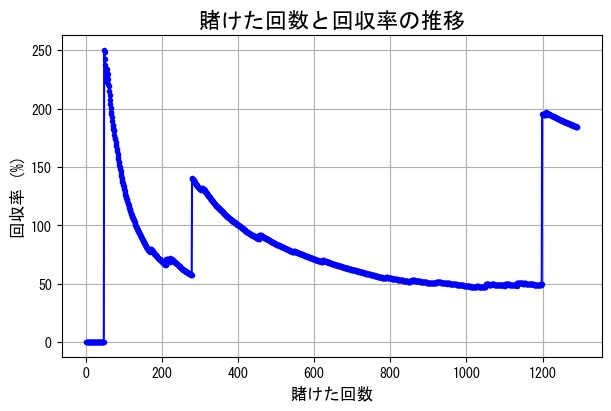

総払い戻し金額: 1227940.0円
賭けた回数: 1291回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010103,0.0,200,200,0.0,0.000000,-200.0
1,202201010202,0.0,600,800,0.0,0.000000,-800.0
2,202201010204,0.0,600,1400,0.0,0.000000,-1400.0
3,202201010309,0.0,600,2000,0.0,0.000000,-2000.0
4,202201010310,0.0,600,2600,0.0,0.000000,-2600.0
...,...,...,...,...,...,...,...
1286,202310030502,0.0,600,664600,1227940.0,1.847638,563340.0
1287,202310030508,0.0,600,665200,1227940.0,1.845971,562740.0
1288,202310030604,0.0,600,665800,1227940.0,1.844308,562140.0
1289,202310030606,0.0,200,666000,1227940.0,1.843754,561940.0


In [44]:
rf.plot_returns_rate(df_22_23)

In [45]:
rf_returns = rf.calc_returns_rate(df_22_23)
rf_returns

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010103,0.0,200,200,0.0,0.000000,-200.0
1,202201010202,0.0,600,800,0.0,0.000000,-800.0
2,202201010204,0.0,600,1400,0.0,0.000000,-1400.0
3,202201010309,0.0,600,2000,0.0,0.000000,-2000.0
4,202201010310,0.0,600,2600,0.0,0.000000,-2600.0
...,...,...,...,...,...,...,...
1286,202310030502,0.0,600,664600,1227940.0,1.847638,563340.0
1287,202310030508,0.0,600,665200,1227940.0,1.845971,562740.0
1288,202310030604,0.0,600,665800,1227940.0,1.844308,562140.0
1289,202310030606,0.0,200,666000,1227940.0,1.843754,561940.0


In [46]:
rf_returns[rf_returns['returns'] > 0]

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
47,202202010509,63090.0,600,25200,63090.0,2.503571,37890.0
52,202202010803,1450.0,600,27800,64540.0,2.321583,36740.0
55,202203010106,4770.0,600,29600,69310.0,2.341554,39710.0
168,202205010405,3090.0,600,90200,72400.0,0.802661,-17800.0
193,202205020805,390.0,200,102000,72790.0,0.713627,-29210.0
210,202205030504,5890.0,600,110600,78680.0,0.711392,-31920.0
220,202205030809,3870.0,200,115000,82550.0,0.717826,-32450.0
278,202206020602,119640.0,200,143800,202190.0,1.406050,58390.0
303,202206030602,3790.0,200,155600,205980.0,1.323779,50380.0
308,202206030704,1370.0,600,157800,207350.0,1.314005,49550.0


In [47]:
pred_df[(pred_df['predicted_target'] == 1) & (pred_df['race_id'] == 202201010606)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
783,202201010606,1.0,0.87,1
784,202201010606,2.0,0.71,1
789,202201010606,12.0,0.60,1
790,202201010606,6.0,0.71,1
793,202201010606,3.0,0.76,1


## NNmodel

In [32]:
%autoreload

In [33]:
nn = predict.NNModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = nn.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)


input_size: 30

Confusion Matrix:
 [[6358 3532]
 [ 890 1979]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.64      0.74      9890
           1       0.36      0.69      0.47      2869

    accuracy                           0.65     12759
   macro avg       0.62      0.67      0.61     12759
weighted avg       0.76      0.65      0.68     12759

Accuracy: 0.6534211145074066
predicted_target
0    28935
1    22560
Name: count, dtype: int64
            race_id  horse_id  jockey_id  trainer_id  rank  frame  number  \
1      202201010101      9390         37          11   4.0      2       2   
3      202201010101      7667         75          19   5.0      4       4   
6      202201010102      3823        130         146   5.0      2       2   
7      202201010102      5378        108         154   1.0      3       3   
8      202201010102      4074         40         161   3.0      4       4   
...             ...       ... 

c:\Users\SV8\m\p\keiba\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


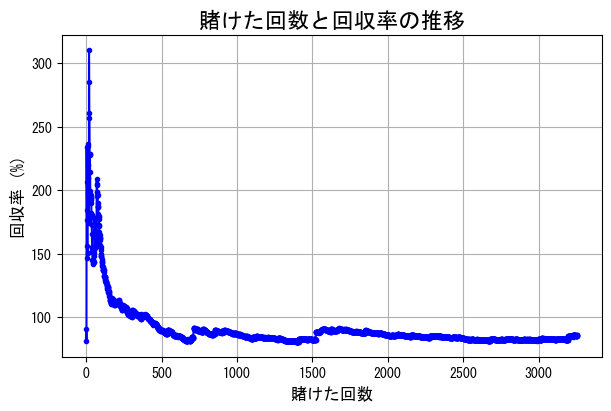

総払い戻し金額: 3411150.0円
賭けた回数: 3256回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010102,3170.0,3500,3500,3170.0,0.905714,-330.0
1,202201010103,0.0,400,3900,3170.0,0.812821,-730.0
2,202201010104,14140.0,3500,7400,17310.0,2.339189,9910.0
3,202201010106,0.0,1000,8400,17310.0,2.060714,8910.0
4,202201010107,0.0,1000,9400,17310.0,1.841489,7910.0
...,...,...,...,...,...,...,...
3251,202310030802,0.0,400,3973000,3392500.0,0.853889,-580500.0
3252,202310030803,0.0,100,3973100,3392500.0,0.853867,-580600.0
3253,202310030804,18650.0,2000,3975100,3411150.0,0.858129,-563950.0
3254,202310030808,0.0,100,3975200,3411150.0,0.858108,-564050.0


In [50]:
nn.plot_returns_rate(df_22_23)

## LGBmodel

In [51]:
%autoreload

In [52]:
lgb = predict.LGBModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = lgb.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

[LightGBM] [Info] Number of positive: 11526, number of negative: 11526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28558
[LightGBM] [Info] Number of data points in the train set: 23052, number of used features: 194
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 11526, number of negative: 11526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5697
[LightGBM] [Info] Number of data points in the train set: 23052, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
 [[6860 3030]
 [ 849 2020]]
Classification Report:
               precision    recall  f1-score   supp

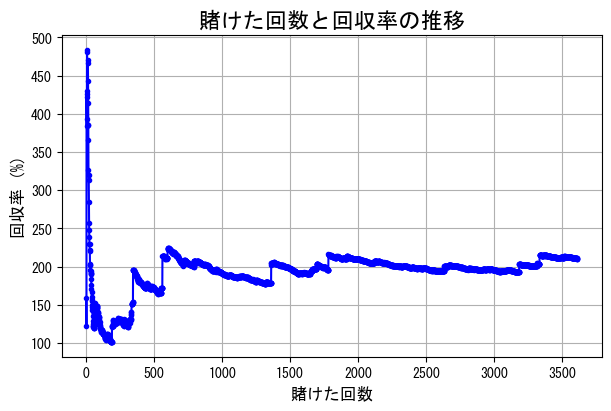

総払い戻し金額: 8131990.0円
賭けた回数: 3611回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010102,3170.0,2000,2000,3170.0,1.585000,1170.0
1,202201010103,0.0,600,2600,3170.0,1.219231,570.0
2,202201010104,14140.0,1500,4100,17310.0,4.221951,13210.0
3,202201010106,0.0,300,4400,17310.0,3.934091,12910.0
4,202201010107,0.0,100,4500,17310.0,3.846667,12810.0
...,...,...,...,...,...,...,...
3606,202310030802,0.0,1000,3857700,8131990.0,2.107989,4274290.0
3607,202310030803,0.0,2000,3859700,8131990.0,2.106897,4272290.0
3608,202310030807,0.0,2800,3862500,8131990.0,2.105370,4269490.0
3609,202310030808,0.0,2000,3864500,8131990.0,2.104280,4267490.0


In [53]:
lgb.plot_returns_rate(df_22_23)

## XGBmodel

In [54]:
%autoreload

In [55]:
xgb = predict.XGBModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = xgb.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[6860 3030]
 [ 856 2013]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.69      0.78      9890
           1       0.40      0.70      0.51      2869

    accuracy                           0.70     12759
   macro avg       0.64      0.70      0.64     12759
weighted avg       0.78      0.70      0.72     12759

Accuracy: 0.6954306763852967
Selected Feature Importance:
                                       feature  importance
80        rank_mean_in_mode_course_len_past_5    0.083024
33                           rank_mean_past_5    0.035625
81         rank_min_in_mode_course_len_past_5    0.020147
43                          prize_mean_past_5    0.017519
18                                   rank_min    0.014717
195     jockey_top_3_proba_max_last_two_years    0.013843
156              jockey_top_3_proba_last_year    0.013710
146               jockey_stakes_win_last_year    0.012446
34                    

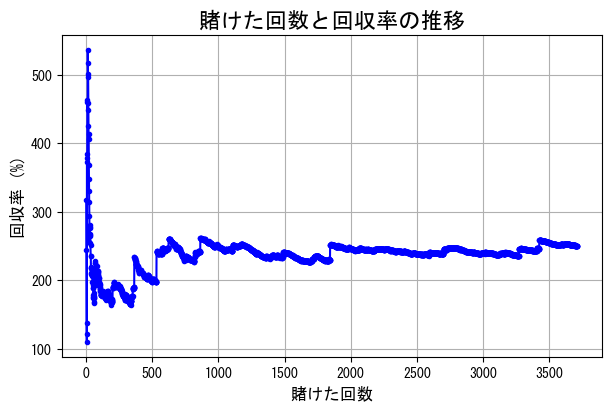

総払い戻し金額: 8793920.0円
賭けた回数: 3711回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010102,3170.0,1000,1000,3170.0,3.170000,2170.0
1,202201010103,0.0,300,1300,3170.0,2.438462,1870.0
2,202201010104,0.0,1000,2300,3170.0,1.378261,870.0
3,202201010106,0.0,300,2600,3170.0,1.219231,570.0
4,202201010107,0.0,300,2900,3170.0,1.093103,270.0
...,...,...,...,...,...,...,...
3706,202310030712,0.0,100,3518400,8793920.0,2.499409,5275520.0
3707,202310030802,0.0,600,3519000,8793920.0,2.498983,5274920.0
3708,202310030803,0.0,400,3519400,8793920.0,2.498699,5274520.0
3709,202310030807,0.0,2100,3521500,8793920.0,2.497209,5272420.0


In [56]:
xgb.plot_returns_rate(df_22_23)

## Ensamblemodel

In [138]:
%autoreload

In [139]:
en = predict.EnsembleModel(
  train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.6, 
  stochastic_variation=False, max_bet=1000, pivot_horse=True, save=True
)
pred_df = en.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())



 training... 


Confusion Matrix:
 [[5851 1395]
 [ 966 1088]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      7246
           1       0.44      0.53      0.48      2054

    accuracy                           0.75      9300
   macro avg       0.65      0.67      0.66      9300
weighted avg       0.77      0.75      0.75      9300

Accuracy: 0.7461290322580645
Selected Feature Importance:
                                      feature  importance
71       rank_mean_in_mode_course_len_past_5    0.034372
78       prize_sum_in_mode_course_len_past_5    0.021580
29                          rank_mean_past_5    0.020450
77      prize_mean_in_mode_course_len_past_5    0.018467
74  rank_diff_mean_in_mode_course_len_past_5    0.017692
15                                 rank_mean    0.017260
72        rank_min_in_mode_course_len_past_5    0.016200
62              rank_mean_in_mode_course_len    0.015945
33            

[(0, 1, 2), (0, 1, 3), (0, 2, 3)]
[(4, 5, 6), (4, 5, 7), (4, 5, 8), (4, 6, 7), (4, 6, 8), (4, 7, 8), (5, 6, 7), (5, 6, 8), (5, 7, 8), (6, 7, 8)]
[(10, 9, 11), (10, 9, 12), (10, 11, 12)]
[(15, 13, 14)]
[(16, 17, 18)]
[(22, 23, 24), (22, 23, 25), (22, 24, 25), (23, 24, 25)]
[(26, 27, 28)]
[(29, 30, 31), (29, 30, 32), (29, 31, 32), (30, 31, 32)]
[(33, 34, 35), (33, 34, 36), (33, 35, 36), (34, 35, 36)]
[(40, 37, 38), (40, 37, 39), (40, 37, 41), (40, 38, 39), (40, 38, 41), (40, 39, 41)]
[(42, 43, 44)]
[(45, 46, 47), (45, 46, 48), (45, 46, 49), (45, 47, 48), (45, 47, 49), (45, 48, 49)]
[(50, 51, 52)]
[(53, 54, 55)]
[(58, 59, 60), (58, 59, 61), (58, 59, 62), (58, 60, 61), (58, 60, 62), (58, 61, 62), (59, 60, 61), (59, 60, 62), (59, 61, 62), (60, 61, 62)]
[(66, 67, 68), (66, 67, 69), (66, 67, 70), (66, 68, 69), (66, 68, 70), (66, 69, 70), (67, 68, 69), (67, 68, 70), (67, 69, 70), (68, 69, 70)]
[(74, 71, 72), (74, 71, 73), (74, 71, 75), (74, 71, 76), (74, 72, 73), (74, 72, 75), (74, 72, 76), (7

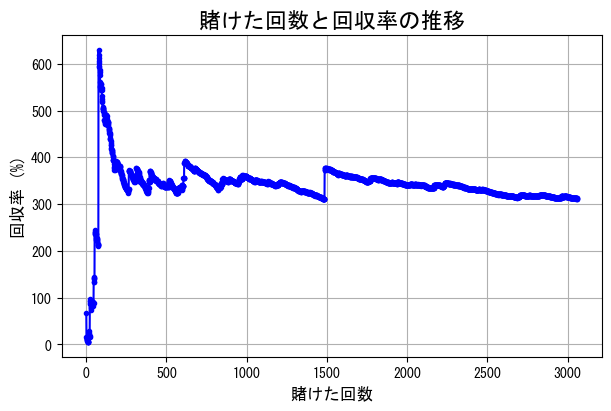

総払い戻し金額: 3990710.0円
賭けた回数: 3059回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010101,200.0,300,300,200.0,0.666667,-100.0
1,202201010102,0.0,1000,1300,200.0,0.153846,-1100.0
2,202201010103,0.0,300,1600,200.0,0.125000,-1400.0
3,202201010104,0.0,100,1700,200.0,0.117647,-1500.0
4,202201010106,0.0,100,1800,200.0,0.111111,-1600.0
...,...,...,...,...,...,...,...
3054,202310030704,0.0,600,1272700,3969460.0,3.118928,2696760.0
3055,202310030707,0.0,100,1272800,3969460.0,3.118683,2696660.0
3056,202310030802,2600.0,1000,1273800,3972060.0,3.118276,2698260.0
3057,202310030804,18650.0,1000,1274800,3990710.0,3.130460,2715910.0


In [140]:
en.plot_returns_rate(df_22_23)

In [141]:
en_returns = en.calc_results(df_22_23)

[(0, 1, 2), (0, 1, 3), (0, 2, 3)]
[(4, 5, 6), (4, 5, 7), (4, 5, 8), (4, 6, 7), (4, 6, 8), (4, 7, 8), (5, 6, 7), (5, 6, 8), (5, 7, 8), (6, 7, 8)]
[(10, 9, 11), (10, 9, 12), (10, 11, 12)]
[(15, 13, 14)]
[(16, 17, 18)]
[(22, 23, 24), (22, 23, 25), (22, 24, 25), (23, 24, 25)]
[(26, 27, 28)]
[(29, 30, 31), (29, 30, 32), (29, 31, 32), (30, 31, 32)]
[(33, 34, 35), (33, 34, 36), (33, 35, 36), (34, 35, 36)]
[(40, 37, 38), (40, 37, 39), (40, 37, 41), (40, 38, 39), (40, 38, 41), (40, 39, 41)]
[(42, 43, 44)]
[(45, 46, 47), (45, 46, 48), (45, 46, 49), (45, 47, 48), (45, 47, 49), (45, 48, 49)]
[(50, 51, 52)]
[(53, 54, 55)]
[(58, 59, 60), (58, 59, 61), (58, 59, 62), (58, 60, 61), (58, 60, 62), (58, 61, 62), (59, 60, 61), (59, 60, 62), (59, 61, 62), (60, 61, 62)]
[(66, 67, 68), (66, 67, 69), (66, 67, 70), (66, 68, 69), (66, 68, 70), (66, 69, 70), (67, 68, 69), (67, 68, 70), (67, 69, 70), (68, 69, 70)]
[(74, 71, 72), (74, 71, 73), (74, 71, 75), (74, 71, 76), (74, 72, 73), (74, 72, 75), (74, 72, 76), (7

In [142]:
671  / 2768

0.24241329479768786

In [146]:
en_returns[en_returns['returns'] > 0]

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010101,200.0,300,300,200.0,0.666667,-100.0
14,202201010210,1360.0,1000,5600,1560.0,0.278571,-4040.0
22,202201010408,7840.0,1000,10600,9400.0,0.886792,-1200.0
24,202201010503,2130.0,1000,11900,11530.0,0.968908,-370.0
31,202201010606,2460.0,400,16200,13990.0,0.863580,-2210.0
...,...,...,...,...,...,...,...
3044,202310030509,400.0,100,1267700,3965890.0,3.128414,2698190.0
3047,202310030602,1280.0,1000,1269100,3967170.0,3.125971,2698070.0
3052,202310030702,2290.0,400,1271100,3969460.0,3.122854,2698360.0
3056,202310030802,2600.0,1000,1273800,3972060.0,3.118276,2698260.0


In [147]:
pred_df[(pred_df['predicted_target'] == 1) & (pred_df['race_id'] == 202201010101)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
0,202201010101,1.0,0.923570,1
2,202201010101,2.0,0.910135,1
3,202201010101,5.0,0.698386,1
4,202201010101,3.0,0.818284,1


In [145]:
pred_df[pred_df['predicted_proba'] >= 0.85][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
0,202201010101,1.0,0.923570,1
2,202201010101,2.0,0.910135,1
21,202201010103,7.0,0.941704,1
26,202201010103,1.0,0.904281,1
40,202201010104,10.0,0.904884,1
...,...,...,...,...
47113,202310030802,2.0,0.955980,1
47116,202310030802,1.0,0.912627,1
47119,202310030802,3.0,0.876364,1
47147,202310030804,2.0,0.863812,1


In [244]:
pred_df[(pred_df['predicted_proba'] >= 0.85) & (pred_df['rank'] == 1)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
66,202201010106,1.0,0.949900,1
601,202201010503,1.0,0.940648,1
654,202201010507,1.0,0.873339,1
892,202201020101,1.0,0.891271,1
1121,202201020207,1.0,0.859515,1
...,...,...,...,...
46534,202310030408,1.0,0.881263,1
46693,202310030507,1.0,0.899776,1
46789,202310030602,1.0,0.922170,1
46992,202310030704,1.0,0.909107,1


In [242]:
887/2420

0.3665289256198347